In [23]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

In [24]:
t = pd.read_csv("twitterData.csv")
t.head()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,sentiment
0,616698673,2022-02-13 23:20:05+00:00,,1493002063491436544,en,0,0,0,200,Twitter Web App,RT @ac_eco: This really is an insane chart com...,negative
1,1481435266258591745,2022-02-13 20:13:54+00:00,,1492955210964082689,en,0,0,0,0,Twitter for Android,@JezCorden In Canada the average price of a ho...,negative
2,377686386,2022-02-13 18:18:20+00:00,,1492926127320432642,en,0,0,0,1,Twitter for iPhone,RT @PaulKulig_TO: @mobilitytings @bambinoir Th...,negative
3,1354444747,2022-02-13 17:00:17+00:00,,1492906486200217605,en,0,0,0,15,Twitter for iPhone,RT @BenRabidoux: Toronto housing now crazier t...,negative
4,3300074168,2022-02-13 16:59:51+00:00,,1492906375181074432,en,0,0,1,0,Twitter for iPhone,@DrJesseMorse @NFLFIRE100 Come try to find a h...,negative


In [25]:
sentiments = t['sentiment']
sentiments.value_counts()

negative    84
positive    42
Name: sentiment, dtype: int64

In [26]:
from sklearn import feature_extraction
tweets = t['tweet']
tfidVector = feature_extraction.text.TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = "english")
dfTFIDF = tfidVector.fit_transform(tweets)
dfTFIDF.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.42059658],
       ...,
       [0.18251065, 0.        , 0.        , ..., 0.        , 0.32269896,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.38921804,
        0.        ]])

In [27]:
names = tfidVector.get_feature_names_out()
names

array(['000', '10', '164', '2017', '2021', '2022', '21', '25', '50',
       '700k', '72', '800', '8kc', 'acceleration', 'according', 'acres',
       'actual', 'address', 'addressing', 'afford', 'affordable', 'ago',
       'alberta', 'alert', 'amp', 'annually', 'appreciation', 'average',
       'away', 'bank', 'based', 'bathrooms', 'bc', 'bcpoli', 'believe',
       'benchmark', 'benefits', 'benrabidoux', 'better', 'biggest',
       'bisontrample', 'bobkronbauer', 'borrowing', 'bought', 'breaking',
       'bring', 'broke', 'broker', 'building', 'buyers', 'ca', 'calgary',
       'canada', 'canadian', 'carbon', 'cities', 'city', 'click', 'close',
       'closer', 'clovermortgage', 'compare', 'composite', 'conditions',
       'construction', 'contact', 'continue', 'continues', 'cost',
       'costs', 'councillors', 'country', 'crazier', 'crazy', 'crea',
       'dan', 'daniel_foch', 'data', 'debt', 'demand', 'detached', 'did',
       'didn', 'directly', 'dollars', 'downtown', 'driving', 'dro

In [28]:
from sklearn import model_selection, naive_bayes
X_train, X_test, y_train, y_test = model_selection.train_test_split(dfTFIDF, sentiments, test_size = 0.2, train_size = 0.8, random_state = 42)
X_train = X_train.toarray()
X_test = X_test.toarray()


In [29]:
gnb = naive_bayes.MultinomialNB()
gnb.fit(X_train, y_train)

MultinomialNB()

In [30]:
trainingscore = gnb.score(X_train, y_train)
print("The score of this array on the training data is:", trainingscore)

The score of this array on the training data is: 0.94


In [31]:
test_prediction = gnb.predict(X_test)


<AxesSubplot:>

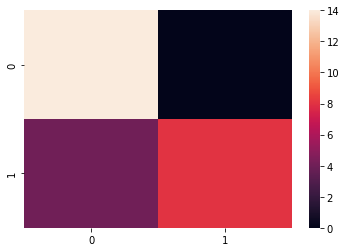

In [32]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, test_prediction)
sns.heatmap(confusion)

In [33]:
newSamples = ["vancouver housing price too high", "canada\'s housing market had the best year ever with price growth continues across canada"]
testSamples = tfidVector.transform(newSamples)
testSamples = testSamples.toarray()

newPrediction = gnb.predict(testSamples)
print(newPrediction)

['negative' 'positive']
